## Sensib ricerca

$$h_{0,min} \approx \frac{4.02}{N^{1/4}\theta_{thr}^{1/2}} \left(\frac{p_0(1-p_0)}{p_1^2}\right)^{1/4}\sqrt{CR_{thr}-\sqrt{2}erfc^{-1}(2\Gamma)} \cdot \sqrt{\frac{S_n(\nu)}{T_{FFT}}}$$

Poniamo


* $\Gamma = 0.9545$
* $\theta_{thr} = 2.5$ (TODO CONTROL)
* $T_{FFT} = 8192$ (o $4096$)
* $N \sim 3400$ (TODO CONTROL)
* $p_0 = 0.0755$, $p_1 = 0.0692$


In [1]:
import numpy
import math
import pylab
import scipy.special as scsp

In [2]:
tFft = 8192
tObs = 9*30*24*60*60
Ntempi = tObs/(tFft/2)*0.6
Ntempi = numpy.int(Ntempi)
print(Ntempi)

3417


In [43]:
#VARIO N
N = numpy.linspace(1,Ntempi,10*Ntempi)
theta = 2.5
sogliaCR = 6
gamma = 0.9545


#p0 è prob di avere picco in peakmap
p0 = math.exp(-theta)-math.exp(-2*theta)+1/3*math.exp(-3*theta)
p1 = math.exp(-theta)-2*math.exp(-2*theta)+math.exp(-3*theta)
print(p0, p1)
probs = p0*(1-p0)/(N*math.pow(p1,2))
confs = sogliaCR - math.sqrt(2)*scsp.erfcinv(2*gamma)

#const0min = 4.02*math.pow(N,-1/4)*math.pow(theta,-1/2)*math.pow(probs, 1/4)*math.pow(confs, 1/2)*math.pow(tFft,-1/2)
#const0min

lambda0min = (2 / theta**2) * numpy.power(probs, 1/2)*confs
lambda0min

0.07553141308152929 0.0691621889958757


array([ 9.4021186 ,  8.96467567,  8.58310914, ...,  0.1608481 ,
        0.16084575,  0.1608434 ])

<IPython.core.display.Javascript object>


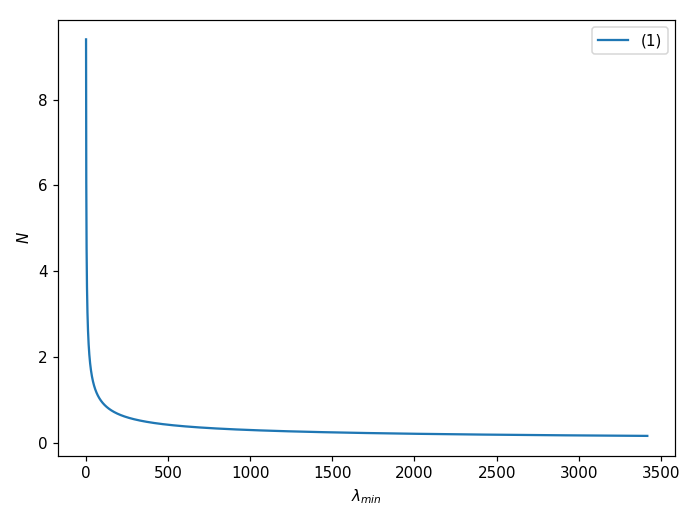

In [44]:
%matplotlib notebook
pylab.plot(N,lambda0min, label = '(1)')
#pylab.plot(L, 1e-8*F*L/c)
pylab.xlabel('$\lambda_{min}$')
pylab.ylabel('$N$')
pylab.tight_layout()
#pylab.loglog()
pylab.legend()
pylab.show()

In [45]:
#VARIO THETA

#VARIO N
N = Ntempi
theta = numpy.linspace(1,10,100000)
sogliaCR = 6
gamma = 0.9545


#p0 è prob di avere picco in peakmap
p0 = numpy.exp(-theta)-numpy.exp(-2*theta)+1/3*numpy.exp(-3*theta)
p1 = numpy.exp(-theta)-2*numpy.exp(-2*theta)+numpy.exp(-3*theta)
probs = p0*(1-p0)/(N*numpy.power(p1,2))
confs = sogliaCR - math.sqrt(2)*scsp.erfcinv(2*gamma)

#const0min = 4.02*math.pow(N,-1/4)*math.pow(theta,-1/2)*math.pow(probs, 1/4)*math.pow(confs, 1/2)*math.pow(tFft,-1/2)
#const0min

lambda0min = (2 /numpy.power(theta,2)) * numpy.power(probs, 1/2)*confs
lambda0min

array([ 0.77417274,  0.77400826,  0.77384384, ...,  0.39049077,
        0.39050132,  0.39051186])

<IPython.core.display.Javascript object>


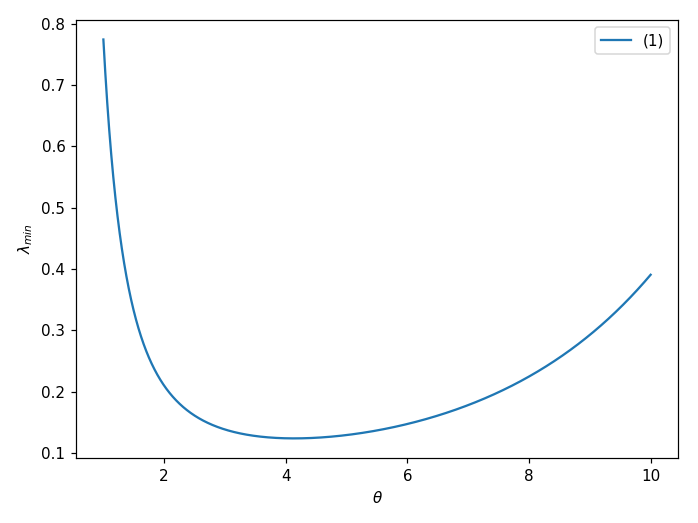

In [46]:
%matplotlib notebook
pylab.plot(theta,lambda0min, label = '(1)')
#pylab.plot(L, 1e-8*F*L/c)
pylab.xlabel('$\\theta$')
pylab.ylabel('$\lambda_{min}$')
pylab.tight_layout()
#pylab.loglog()
pylab.legend()
pylab.show()

In [4]:
#VARIO SOGLIA CR

#VARIO N
N = Ntempi
theta = 2.5
sogliaCR = numpy.linspace(1,10,100000)
gamma = 0.9545


#p0 è prob di avere picco in peakmap
p0 = math.exp(-theta)-math.exp(-2*theta)+1/3*math.exp(-3*theta)
p1 = math.exp(-theta)-2*math.exp(-2*theta)+math.exp(-3*theta)
print(p0, p1)
probs = p0*(1-p0)/(N*math.pow(p1,2))
confs = sogliaCR - math.sqrt(2)*scsp.erfcinv(2*gamma)

#const0min = 4.02*math.pow(N,-1/4)*math.pow(theta,-1/2)*math.pow(probs, 1/4)*math.pow(confs, 1/2)*math.pow(tFft,-1/2)
#const0min

lambda0min = (2 / theta**2) * numpy.power(probs, 1/2)*confs
lambda0min

0.07553141308152929 0.0691621889958757


array([ 0.0562658 ,  0.05626768,  0.05626957, ...,  0.24450171,
        0.24450359,  0.24450547])

In [5]:
%matplotlib notebook
pylab.plot(sogliaCR,lambda0min, label = '(1)')
pylab.plot(sogliaCR,lambda0min, label = '(2)')
#pylab.plot(L, 1e-8*F*L/c)
pylab.xlabel('$CR_{thr}$')
pylab.ylabel('$\lambda_{min}$')
pylab.tight_layout()
#pylab.loglog()
#pylab.legend()
pylab.show()

## Scelgo soglia CR

$$P_{fa} = \frac{N_{rumorcand}}{N_{tot}}$$

$$P_{fa} = \frac{1}{2}erfc\left(\frac{CR_{thr}}{\sqrt{2}}\right)$$


$$CR_{thr} = \sqrt{2} erfc^{-1} \left(2\frac{N_{cand}}{N_{tot}}\right)$$
$$Ntot = Nfreq*Ntimes*Nspindowns*Ncoords$$

In [3]:
sogliaCR = numpy.linspace(0,10,100000)

pfa = scsp.erfc(sogliaCR/math.sqrt(2))

%matplotlib qt
pylab.plot(sogliaCR,pfa)
#pylab.plot(L, 1e-8*F*L/c)
pylab.xlabel('$CR_{thr}$')
pylab.ylabel('$P_{fa}$')
#pylab.tight_layout()
#pylab.loglog()
pylab.semilogy()
pylab.xlim(0,10)
#pylab.ylim(1e-23,1)
#pylab.locator_params(axis='y', nticks=10)
#pylab.legend()
pylab.show()

In [1]:
import numpy
import math
import pylab
import scipy.special as scsp

tFft = 8192
tObs = 9*30*24*60*60
Ntempi = tObs/(tFft/2)*0.5
Ntempi = numpy.int(Ntempi)
print(Ntempi)

quadSize = 78
stepFrequenza = 1/tFft
freqMax = 128
freqMin = 10

spindownMin = -1e-9
spindownMax = 1e-10
stepSpindown = stepFrequenza/tObs 

Nsd = round((spindownMax-spindownMin)/stepSpindown)
peakSize = (freqMax-freqMin)/stepFrequenza * Ntempi
freqSize = (freqMax-freqMin)/stepFrequenza
print(Nsd, freqSize, quadSize)

Ntot = freqSize*10*Nsd*quadSize
Ntot/1e9

2847
210 966656.0 78


158.3382528

In [2]:
(2*835665)**2/158338252800

17.64162430431972

In [3]:
(835665+860125+935532+934000+937000+977000)/1e6

5.479322

In [5]:
(18890+19685+22365+21563+21898+23391)/1e6

0.127792

In [6]:
#se scelgo che solo uno dei candidati sia dovuto a fluttuazione di rumore Pfa sarà
Nrum = 1
Pfa = Nrum/Ntot
print(Pfa)

#e soglia sarà

CR = math.pow(2,1/2)*scsp.erfcinv(2*Nrum/Ntot)
print(CR)

6.315593246207653e-12
6.77280188991


In [15]:
CR8 = 6.77280188991
CR4 = 6.91232393771

In [17]:
#se scelgo che voglio una confidenza di 3 sigma che i miei candidati NON siano fluttuazione di rumore,
#allora Pfa srà
confSigma = 0.997 
Pfa = 1-confSigma
Nrum = Pfa*Ntot
print(Nrum)

#e soglia CR

CR = math.pow(2,1/2)*scsp.erfcinv(2*Nrum/Ntot)
print(CR)

47501475.84000004
2.74778138544


In [18]:
#se scelgo che voglio una confidenza di 3 sigma che i miei candidati NON siano fluttuazione di rumore,
#allora Pfa srà
confSigma = 0.999999426697 
Pfa = 1-confSigma
Nrum = Pfa*Ntot
print(Nrum)

#e soglia CR

CR = math.pow(2,1/2)*scsp.erfcinv(2*Nrum/Ntot)
print(CR)




9077.57953390079
4.86464814274


Voglio vedere quanti candidati produco con un certo livello di sensibilità